In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import seaborn as sns

# Import preprocessing libraries 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

# Import Dimensionality Reduction libraries
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from sklearn.manifold import LocallyLinearEmbedding
#pip install umap-learn
# import umap.umap_ as umap


# Import Clustering Algorithms 
from sklearn.cluster import KMeans   
#from sklearn_extra.cluster import KMedoids
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet 
from sklearn.cluster import DBSCAN

from sklearn.neighbors import NearestNeighbors

# Compute distances
from scipy.spatial.distance import cdist, pdist

# To visualize Silhouette scores


# Cluster evaluation metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, silhouette_samples

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Remove scientific notations and display with 2 decimals
pd.options.display.float_format = '{:,.2f}'.format  

# Remove limit for number of displayed columns
pd.set_option("display.max_columns", None)
# Set limit for number of displayed rows
pd.set_option("display.max_rows", 200)
from yellowbrick.cluster import SilhouetteVisualizer
import warnings
warnings.filterwarnings('ignore')    # To get rid of warning messages

In [21]:
df = pd.read_csv("players_stats_2015-2022.csv")
df_profiles = pd.read_csv("players_bio_profiles.csv")

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1161 entries, 0 to 1160
Columns: 183 entries, PLAYER_ID_x to GP_Per_Season
dtypes: float64(180), int64(3)
memory usage: 1.6 MB


In [23]:
for col in df.columns:
    if df[col].nunique() == 1:
        print(col)

GP_PCT_TOTAL


In [24]:
# Exact duplicates
df[df.duplicated()]

,PLAYER_ID_x,GP_x,MIN,OFF_RATING,DEF_RATING,NET_RATING,MIN_PG,FGM_x_PG,FGA_x_PG,FG3M_PG,FG3A_PG,FTM_PG,FTA_PG,OREB_x_PG,DREB_x_PG,REB_x_PG,AST_PG,TOV_PG,STL_PG,BLK_PG,BLKA_PG,PF_PG,PFD_PG,PTS_PG,FGM_5-_PG,FGA_5-_PG,FGM_5-9_PG,FGA_5-9_PG,FGM_10-14_PG,FGA_10-14_PG,FGM_15-19_PG,FGA_15-19_PG,FGM_20-24_PG,FGA_20-24_PG,DRIVES_PG,DRIVE_FGM_PG,DRIVE_FGA_PG,DRIVE_FTM_PG,DRIVE_FTA_PG,DRIVE_PTS_PG,DRIVE_PASSES_PG,DRIVE_AST_PG,DRIVE_TOV_PG,DRIVE_PF_PG,CONTESTED_SHOTS_PG,CONTESTED_SHOTS_2PT_PG,CONTESTED_SHOTS_3PT_PG,DEFLECTIONS_PG,CHARGES_DRAWN_PG,SCREEN_ASSISTS_PG,SCREEN_AST_PTS_PG,OFF_LOOSE_BALLS_RECOVERED_PG,DEF_LOOSE_BALLS_RECOVERED_PG,LOOSE_BALLS_RECOVERED_PG,OFF_BOXOUTS_PG,DEF_BOXOUTS_PG,BOX_OUTS_PG,BOX_OUT_PLAYER_TEAM_REBS_PG,BOX_OUT_PLAYER_REBS_PG,DIST_FEET_PG,DIST_MILES_PG,DIST_MILES_OFF_PG,DIST_MILES_DEF_PG,DFGM_06_PG,DFGA_06_PG,DIFF_06_PG,DFGM_15_PG,DFGA_15_PG,DIFF_15_PG,TOUCHES_x_PG,POST_TOUCHES_x_PG,POST_TOUCH_FGM_PG,POST_TOUCH_FGA_PG,POST_TOUCH_FTM_PG,POST_TOUCH_FTA_PG,POST_TOUCH_PTS_PG,POST_TOUCH_PASSES_PG,POST_TOUCH_AST_PG,POST_TOUCH_TOV_PG,POST_TOUCH_FOULS_PG,FRONT_CT_TOUCHES_PG,TIME_OF_POSS_PG,ELBOW_TOUCHES_PG,PAINT_TOUCHES_PG,OREB_CONTEST_PG,OREB_UNCONTEST_PG,OREB_CHANCES_PG,OREB_CHANCE_DEFER_PG,DREB_CONTEST_PG,DREB_UNCONTEST_PG,DREB_CHANCES_PG,DREB_CHANCE_DEFER_PG,REB_CONTEST_PG,REB_UNCONTEST_PG,REB_CHANCES_PG,PULL_UP_FGM_PG,PULL_UP_FGA_PG,PULL_UP_PTS_PG,PULL_UP_FG3M_PG,PULL_UP_FG3A_PG,CATCH_SHOOT_FGM_PG,CATCH_SHOOT_FGA_PG,CATCH_SHOOT_PTS_PG,CATCH_SHOOT_FG3M_PG,CATCH_SHOOT_FG3A_PG,PASSES_MADE_PG,PASSES_RECEIVED_PG,SECONDARY_AST_PG,POTENTIAL_AST_PG,AST_POINTS_CREATED_PG,FG_PCT_x,FG3_PCT,FT_PCT,AST_PCT,OREB_PCT,DREB_PCT,REB_PCT,TM_TOV_PCT,E_TOV_PCT,EFG_PCT,TS_PCT,FG_PCT_5-,FG_PCT_5-9,FG_PCT_10-14,FG_PCT_15-19,FG_PCT_20-24,DRIVE_FG_PCT,DRIVE_FT_PCT,DRIVE_PTS_PCT,DRIVE_PASSES_PCT,DRIVE_AST_PCT,DRIVE_TOV_PCT,DRIVE_PF_PCT,PCT_LOOSE_BALLS_RECOVERED_OFF,PCT_LOOSE_BALLS_RECOVERED_DEF,PCT_BOX_OUTS_OFF,PCT_BOX_OUTS_DEF,PCT_BOX_OUTS_TEAM_REB,PCT_BOX_OUTS_REB,DFG_PCT_06,DFG_PCT_15,POST_TOUCH_FG_PCT,POST_TOUCH_FT_PCT,POST_TOUCH_PTS_PCT,POST_TOUCH_PASSES_PCT,POST_TOUCH_AST_PCT,POST_TOUCH_TOV_PCT,POST_TOUCH_FOULS_PCT,OREB_CONTEST_PCT,OREB_CHANCE_PCT,OREB_CHANCE_PCT_ADJ,DREB_CONTEST_PCT,DREB_CHANCE_PCT,DREB_CHANCE_PCT_ADJ,REB_CONTEST_PCT,REB_CHANCE_PCT,REB_CHANCE_PCT_ADJ,AST_RATIO,AVG_SPEED,AVG_SPEED_OFF,AVG_SPEED_DEF,AVG_OREB_DIST,AVG_DREB_DIST,AVG_REB_DIST,AVG_SEC_PER_TOUCH,AVG_DRIB_PER_TOUCH,PTS_PER_TOUCH,PTS_PER_ELBOW_TOUCH,PTS_PER_POST_TOUCH,PTS_PER_PAINT_TOUCH,AST_TO,PULL_UP_FG_PCT,PULL_UP_FG3_PCT,PULL_UP_EFG_PCT,CATCH_SHOOT_FG_PCT,CATCH_SHOOT_FG3_PCT,CATCH_SHOOT_EFG_PCT,AST_TO_PASS_PCT,AST_TO_PASS_PCT_ADJ,Pass_Made_PCT,GP_PCT_TOTAL,season_count,GP_Per_Season


In [25]:
# Drop columns that would not add value to model
df.drop(columns = ["GP_PCT_TOTAL", "MIN"], inplace=True) 

In [26]:
df.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
PLAYER_ID_x,"1,161.00","1,029,327.15","719,779.84",708.00,"203,082.00","1,627,761.00","1,629,597.00","1,630,994.00"
GP_x,"1,161.00",152.45,153.86,1.00,25.00,96.00,251.00,"1,352.00"
OFF_RATING,"1,161.00",103.19,11.77,0.00,100.51,104.99,108.45,200.00
DEF_RATING,"1,161.00",107.08,9.61,0.00,104.87,107.58,110.20,185.70
NET_RATING,"1,161.00",-3.89,14.72,-148.20,-7.02,-2.10,1.40,133.30
MIN_PG,"1,161.00",16.71,8.55,0.80,9.73,16.26,22.93,43.52
FGM_x_PG,"1,161.00",2.52,1.87,0.00,1.12,2.15,3.39,10.09
FGA_x_PG,"1,161.00",5.69,3.94,0.00,2.77,4.77,7.53,20.03
FG3M_PG,"1,161.00",0.69,0.68,0.00,0.12,0.52,1.03,4.70
FG3A_PG,"1,161.00",2.05,1.77,0.00,0.62,1.69,3.00,11.19


In [27]:
df.drop(df.loc[(df.MIN_PG <= df.MIN_PG.quantile(0.25)) | (df.GP_x <= 100)].index,
        inplace=True)

In [28]:
df.set_index("PLAYER_ID_x", inplace=True)

In [29]:
data_model = df.drop(
    columns=["OFF_RATING", "DEF_RATING", "NET_RATING", "season_count", "GP_x", "FGA_x_PG", "FG3A_PG", "FTA_PG",
            "FGA_5-_PG", "FGA_5-9_PG", "FGA_10-14_PG", "FGA_15-19_PG", "FGA_20-24_PG", "DFGA_06_PG",
             "DFGA_15_PG", "POST_TOUCH_FGA_PG", "POST_TOUCH_FTA_PG", "DRIVE_FGA_PG", "DRIVE_FTA_PG", 
            "PULL_UP_FGA_PG", "CATCH_SHOOT_FGA_PG", "OREB_UNCONTEST_PG", "DREB_UNCONTEST_PG", "REB_UNCONTEST_PG",
            "CATCH_SHOOT_EFG_PCT", "PULL_UP_EFG_PCT", "REB_x_PG", "POTENTIAL_AST_PG", "AST_RATIO",
            "FGM_x_PG", "FG3M_PG", "FTM_PG", "AST_PG", "MIN_PG", "PTS_PG", "DRIVE_PTS_PG", "CATCH_SHOOT_PTS_PG",
            "PULL_UP_PTS_PG", "PTS_PER_POST_TOUCH", "OREB_CHANCE_DEFER_PG", "DREB_CHANCE_DEFER_PG", "CONTESTED_SHOTS_PG",
            "SCREEN_AST_PTS_PG", "AVG_SPEED_OFF", "AVG_SPEED_DEF", "EFG_PCT", "TM_TOV_PCT", "E_TOV_PCT", "REB_PCT",
            "REB_CONTEST_PG", "REB_CHANCES_PG", "OREB_CONTEST_PG", "OREB_CHANCES_PG", "DREB_CONTEST_PG",
            "DREB_CHANCES_PG", "BOX_OUTS_PG", "BOX_OUT_PLAYER_TEAM_REBS_PG", "BOX_OUT_PLAYER_REBS_PG", "AVG_OREB_DIST",
            "AVG_DREB_DIST", "AST_POINTS_CREATED_PG", "AST_TO_PASS_PCT", "OREB_CHANCE_PCT", "DREB_CHANCE_PCT",
            "REB_CHANCE_PCT", "REB_CONTEST_PCT", "REB_CHANCE_PCT_ADJ", "DIST_MILES_OFF_PG", "DIST_MILES_DEF_PG",
            "DIST_FEET_PG", "POST_TOUCH_PTS_PG", "TOUCHES_x_PG", "POST_TOUCHES_x_PG", "DRIVES_PG", 
             "LOOSE_BALLS_RECOVERED_PG"
           ],
    axis=1
) 

In [30]:
data_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 560 entries, 101106 to 2772
Columns: 105 entries, OREB_x_PG to GP_Per_Season
dtypes: float64(105)
memory usage: 463.8 KB


In [31]:
data_model.T.duplicated(keep=False).value_counts()

False    105
dtype: int64

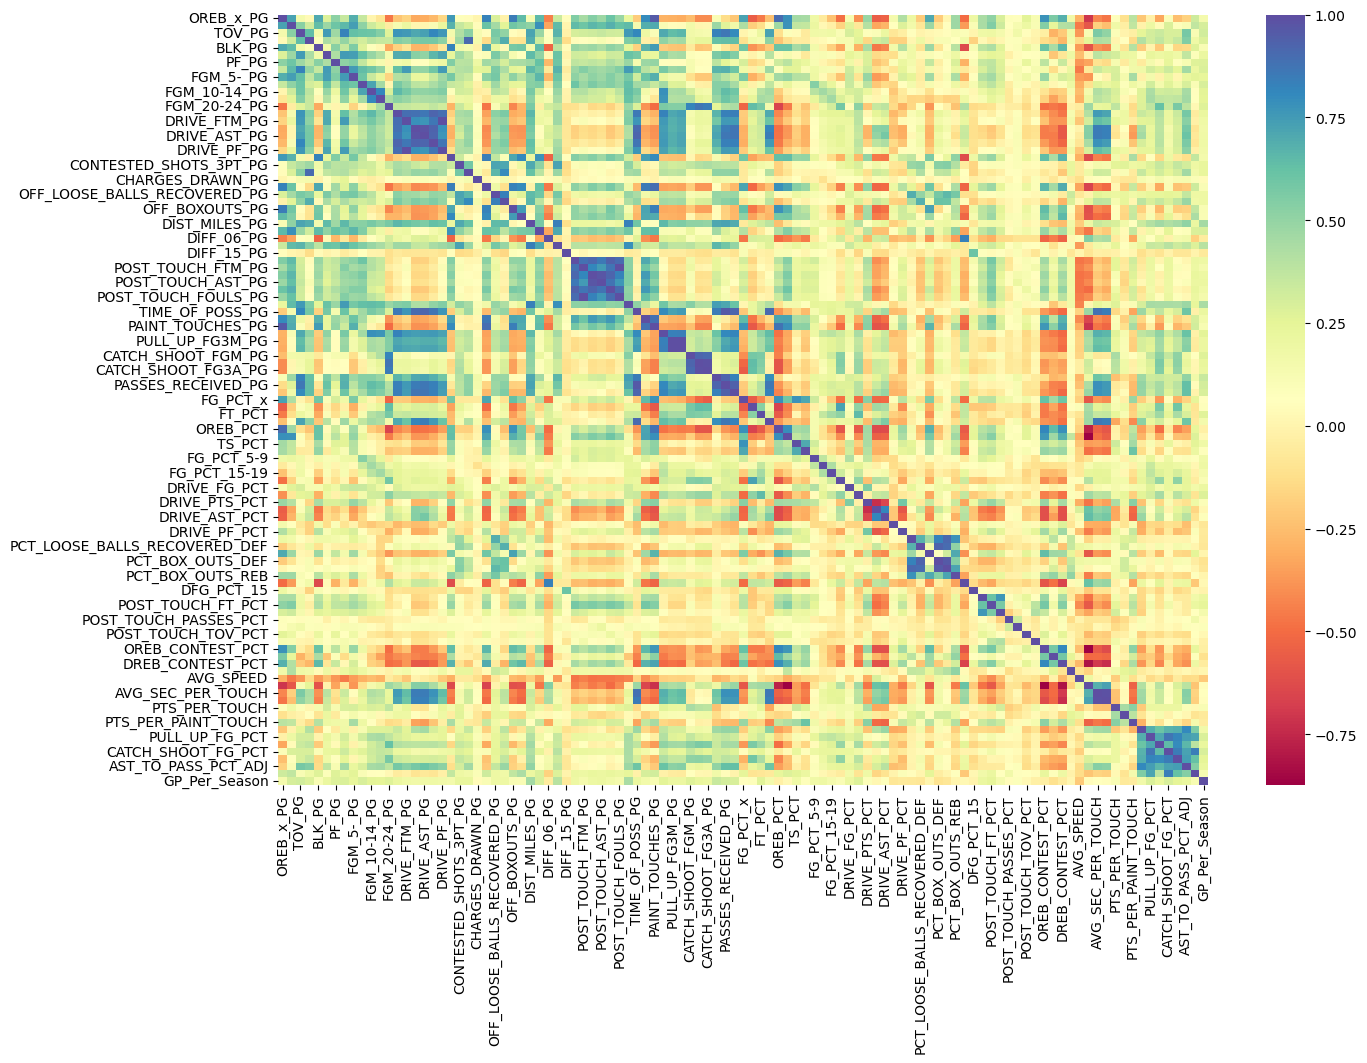

In [32]:
plt.figure(figsize = (15, 10))

sns.heatmap(data_model.corr(), cmap = cm.Spectral)

plt.show()

Even after removing many of the metrics we scrapped there is still multi-collinearity issues. There are many variables that are similar but not the same, and we feel a need to keep both to help describe players.

In [33]:
#scaler = StandardScaler()
scaler = MinMaxScaler()
#scaler = RobustScaler()
#scaler = Normalizer(norm='l1')
#scaler = Normalizer(norm='l2')
#scaler = Normalizer(norm='max')


df_scaled = pd.DataFrame(scaler.fit_transform(data_model), columns = data_model.columns)

In [34]:
# Function to check VIF
def check_vif(X):
    # Calculating VIF for each feature
    return pd.Series([variance_inflation_factor(X.values, i) for i in range(len(X.columns))], index = X.columns)

#check_vif(df_scaled)

vif = check_vif(df_scaled)

vif[vif>5]



OREB_x_PG                         232.79
DREB_x_PG                         293.00
TOV_PG                            146.87
STL_PG                             64.85
BLK_PG                             16.88
BLKA_PG                            35.05
PF_PG                              18.52
PFD_PG                             74.67
FGM_5-_PG                         119.58
FGM_5-9_PG                         33.05
FGM_10-14_PG                       74.35
FGM_15-19_PG                      104.56
FGM_20-24_PG                       50.48
DRIVE_FGM_PG                      109.01
DRIVE_FTM_PG                      380.26
DRIVE_PASSES_PG                   154.81
DRIVE_AST_PG                      161.39
DRIVE_TOV_PG                       99.16
DRIVE_PF_PG                       427.33
CONTESTED_SHOTS_2PT_PG             61.70
CONTESTED_SHOTS_3PT_PG             58.18
DEFLECTIONS_PG                     65.78
SCREEN_ASSISTS_PG                  29.50
OFF_LOOSE_BALLS_RECOVERED_PG      126.39
DEF_LOOSE_BALLS_

Seeing that we have hundreds of metrics, as well as multi-collinearity issues, we want to use Principle Component Analysis in order to reduce the number of variables in our K-means clustering (over 100 as it stands) as well as deal with our multicollinearity issues.

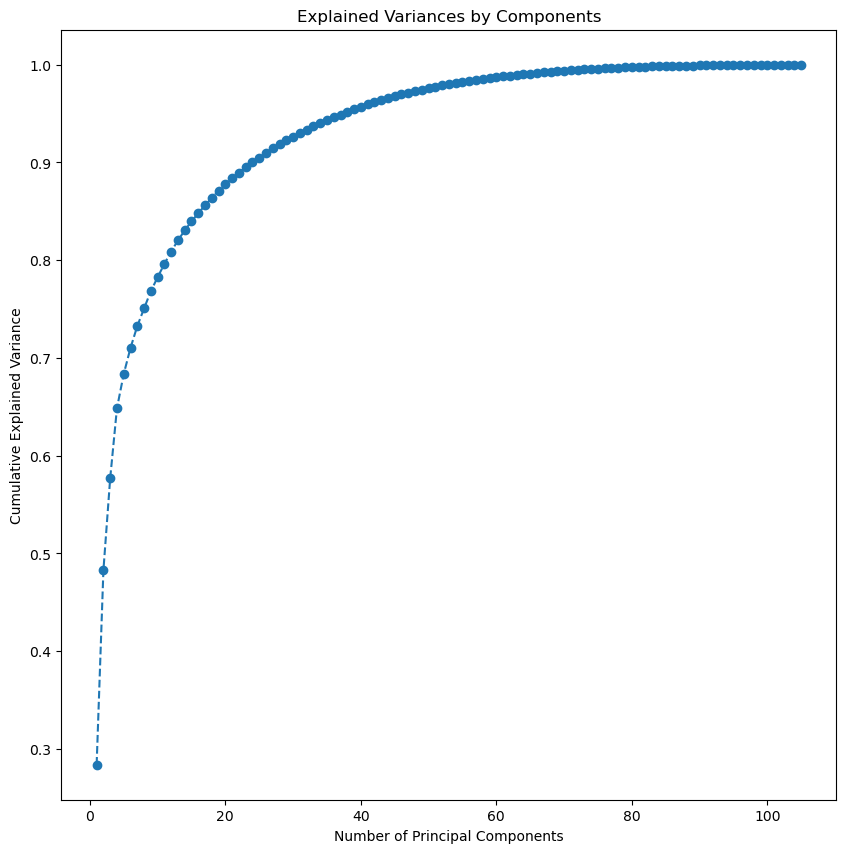

In [35]:
# Define number of principal components to generate
n = df_scaled.shape[1]

# Find principal components for the scaled data
pca = PCA(n_components = n, random_state = 1)

df_pca = pd.DataFrame(pca.fit_transform(df_scaled))

# Percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_

# Plot cumulative explained variance by principal components
plt.figure(figsize = (10, 10))

plt.plot(range(1, n+1), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')

plt.title("Explained Variances by Components")

plt.xlabel("Number of Principal Components")

plt.ylabel("Cumulative Explained Variance")

plt.show()

We chose to move forward with 7 principal components as this is the point where there were heavy diminishing returns.

In [88]:
# Find least number of components that can explain more than 65% variance
sum = 0

for i, variance in enumerate(exp_var):

    sum = sum + variance
    
    if(sum > 0.65):       
        print("Number of PCs that explain at least 65% variance:", i + 1)
        break

Number of PCs that explain at least 65% variance: 5


In [82]:
pc_comps = ['PC1', 'PC2', 'PC3', 'PC4', "PC5", "PC6"]

df_pca1 = pd.DataFrame(np.round(pca.components_.T[:, :6], 2), index = df_scaled.columns, columns = pc_comps)

In [76]:
def color_high(val):
    if val <= -0.10:
        return 'background: pink'
    
    elif val >= 0.10:
        return 'background: skyblue'   
    
#df_pca1.style.applymap(color_high)

In [77]:
def pc_high(PC):
    df_pc = pd.DataFrame(df_pca1[PC].loc[abs(df_pca1[PC]) >= 0.10].sort_values(ascending=False))
    return df_pc.style.applymap(color_high)

pc_high("PC1")

,PC1
AVG_DRIB_PER_TOUCH,0.230000
AVG_SEC_PER_TOUCH,0.220000
AVG_REB_DIST,0.200000
PASSES_RECEIVED_PG,0.180000
DRIVE_PASSES_PG,0.170000
TIME_OF_POSS_PG,0.170000
PULL_UP_FG3_PCT,0.170000
DRIVE_AST_PG,0.160000
PULL_UP_FGM_PG,0.160000
DRIVE_FGM_PG,0.150000


Gives importance to:
- Dribles per second and average second - get ball hold onto it for a while
- High Average rebound distance - perimeter player, play away from net
- High Pass received - team gives them the ball a lot 
- High possession 
- High amount of Pull up
- Shoot from far - 3 point shooter, more perimeter 
- Lots of drives with passes 
- Steals, related to perimeter

Does not give importance to: 
- Box outs
- Elbow touches
- Rebounds 


Interpretation:

Possession player (High average possession/dribbles, high passes recievied)

Perimeter shooter (all the 3pt, pullup, catch and shoot metrics)

Drives the net to make a pass (all the drive and drive passing metrics)

Generally show this person would be less physical

In [78]:
pc_high("PC2")

,PC2
POST_TOUCH_FT_PCT,0.240000
DIST_MILES_PG,0.200000
DFGM_15_PG,0.190000
DREB_x_PG,0.190000
DFGM_06_PG,0.190000
FRONT_CT_TOUCHES_PG,0.180000
PFD_PG,0.170000
FGM_5-_PG,0.170000
FGM_5-9_PG,0.170000
BLKA_PG,0.150000


Gives importance to 
- High defence (DFGM)
- High blocks
- High rebounds
- High personal fouls and touches
- High short to mid range shooting
- High retrieval of loose balls
- Touches elbows 
- Defending and shooting close

Does not give importance to

- Speed
- rebound distance- close to the net

Interpretation: 

Defence man/Physical

Defense (steals, blocks, defends against shots in close and long range, rebounds, looseball recovery)

Offense (Short to mid range shooting, generated offense from post-ups, drives the net to shoot)

Physicality (high touches, lots of fouls for and drawn, screens, boxouts)

In [79]:
pc_high("PC3")

,PC3
POST_TOUCH_FT_PCT,0.180000
FGM_15-19_PG,0.120000
POST_TOUCH_FG_PCT,0.100000
DEFLECTIONS_PG,-0.110000
OREB_CHANCE_PCT_ADJ,-0.120000
DREB_CHANCE_PCT_ADJ,-0.120000
OFF_LOOSE_BALLS_RECOVERED_PG,-0.160000
DEF_LOOSE_BALLS_RECOVERED_PG,-0.160000
CONTESTED_SHOTS_3PT_PG,-0.170000
PCT_BOX_OUTS_REB,-0.250000


Gives Importance to: 
- High Post touch free throws and field goals
- High field goals made


Does not give importance to:
- Deflection
- Loose ball recovered
- Chance of rebound
- Contested shot 3 points
- Box outs 

Interpretation: 

Offense (Generates offense from the post-up, but does not drive middle, instead peels back for mid range shot)

Low defense (low values for defensive metrics mentioned before)

Low Physicality

In [80]:
pc_high("PC4")

,PC4
CATCH_SHOOT_FG3A_PG,0.330000
CATCH_SHOOT_FG3M_PG,0.310000
FGM_20-24_PG,0.270000
PULL_UP_FG3_PCT,0.270000
CATCH_SHOOT_FGM_PG,0.260000
PTS_PER_TOUCH,0.200000
CATCH_SHOOT_FG3_PCT,0.150000
POST_TOUCH_FT_PCT,0.150000
FT_PCT,0.150000
FG3_PCT,0.140000


Gives Importance to: 
- Catch and shoot
- High 3 point shooting 
- Pull up field goals
- Shoot from far

Does not give importance to:
- Passing
- Assists 
- Time of possession
- Rebounds

Interpretation: 

Elite players, shooting 3pt, Less passing, Quick possessions 

In [81]:
pc_high("PC5")

,PC5
STL_PG,0.200000
AST_TO,0.200000
DRIVE_AST_PCT,0.200000
DEFLECTIONS_PG,0.190000
DRIVE_PASSES_PCT,0.190000
PULL_UP_FG3_PCT,0.180000
POST_TOUCH_PASSES_PCT,0.160000
Pass_Made_PCT,0.150000
CATCH_SHOOT_FG_PCT,0.140000
PASSES_MADE_PG,0.140000


Gives Importance to: 
- Deflections
- Steals
- Passing 
- Assists 

Does not give importance to:
- Field goals
- Post touch field goals
- Drive
- Pull up Field goal
- Points per touch

Interpretation: 

Playmaker, Perimiter Defense, Low scoring

In [85]:
df_pca7 = df_pca.filter([0,1,2,3,4,5,6])

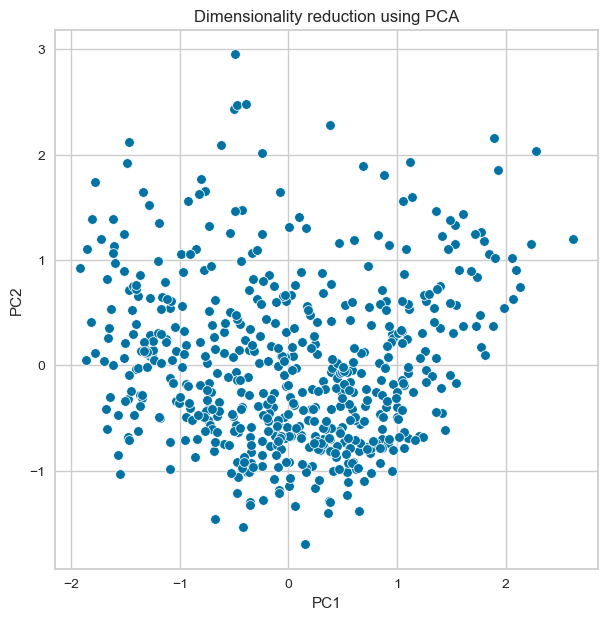

In [94]:
# Visualize data in 2D using first two PCs.
plt.figure(figsize = (7,7))

sns.scatterplot(x = df_pca[0], y = df_pca[1])

plt.xlabel("PC1")

plt.ylabel("PC2")

plt.title("Dimensionality reduction using PCA")

plt.show()

**2D Visualization**

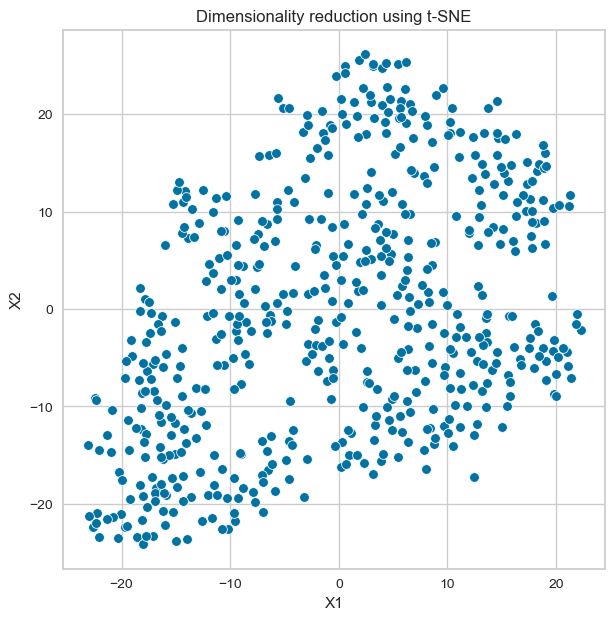

In [131]:
# Fit t-SNE with number of components 
tsne = TSNE(n_components = 2, random_state = 1, perplexity=30) 

# Convert embeddings to a DF
df_tsne = pd.DataFrame(tsne.fit_transform(df_scaled), columns = ['X1', 'X2'])

# Plot in 2D
plt.figure(figsize = (7,7))

sns.scatterplot(x = 'X1', y = 'X2', data = df_tsne)

plt.title("Dimensionality reduction using t-SNE")

plt.show()

**3D Visualization**

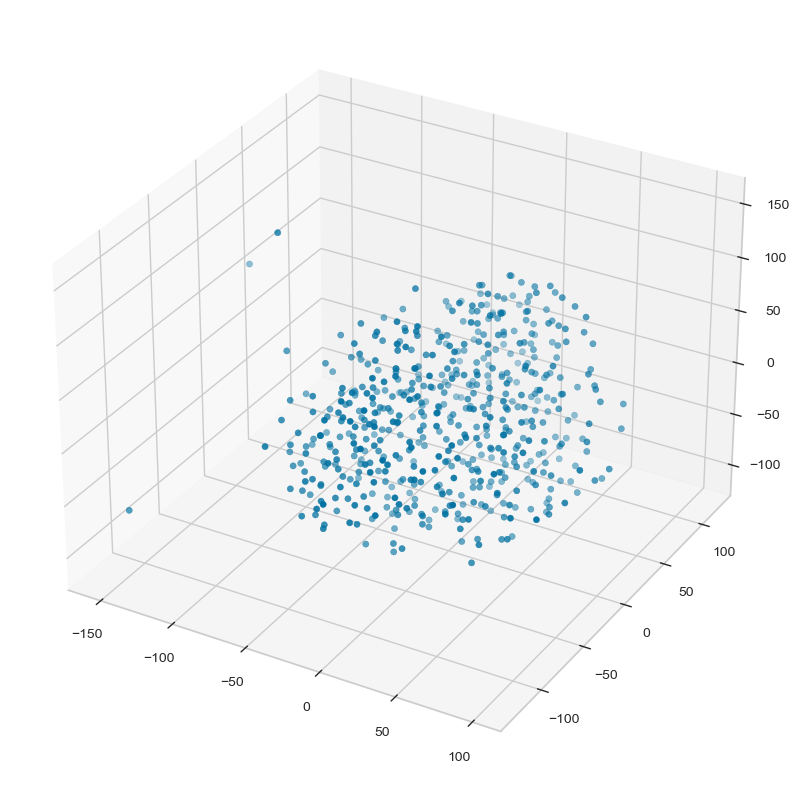

In [132]:
# Fit t-SNE with number of components 
tsne = TSNE(n_components = 3, random_state = 1)

df_tsne = pd.DataFrame(tsne.fit_transform(df_scaled), columns = ['X1', 'X2', 'X3'])

# Plot in 3D
fig = plt.figure(figsize = (10, 10))

ax = fig.add_subplot(111, projection = '3d')

x = df_tsne['X1']

y = df_tsne['X2']

z = df_tsne['X3']

ax.scatter(x, y, z)

plt.show()

In [29]:
# Create a copy of DF to store cluster labels
df_copy = df.copy(deep=True)

**K-Means**

For n_clusters: 2, the SSE is 828.6455125707998
For n_clusters: 3, the SSE is 642.0535554411688
For n_clusters: 4, the SSE is 556.2677894254153
For n_clusters: 5, the SSE is 492.67878338151667
For n_clusters: 6, the SSE is 432.68435234389347
For n_clusters: 7, the SSE is 393.18227381025144
For n_clusters: 8, the SSE is 368.46853342075207
For n_clusters: 9, the SSE is 344.2481785150033
For n_clusters: 10, the SSE is 320.75185239595294
For n_clusters: 11, the SSE is 306.35543445559074


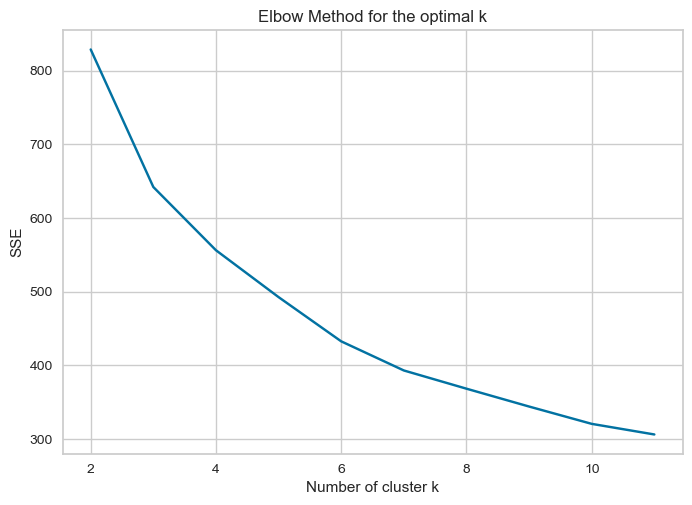

In [30]:
# Initialize dict to store SSE for each k
sse = {} 

# Find optimal n_clusters 
# Use inertia attribute for SSE and store 
for k in range(2, 12):
    kmeans = KMeans(n_clusters = k, random_state = 1).fit(df_pca7)
    sse[k] = kmeans.inertia_
    print(f"For n_clusters: {k}, the SSE is {sse[k]}")

# Elbow plot
plt.figure()

plt.plot(list(sse.keys()), list(sse.values()), 'bx-')

plt.xlabel("Number of cluster k")

plt.ylabel("SSE")

plt.title("Elbow Method for the optimal k")

plt.show()

There is no clear point where there is a significant change besides 3 clusters.
However we want to take a number of clusters above the number of Position in basketball, so that we can create insights.
A clustering algorithm that provides 5 or less groups when there is 5 pre-established positions is not very insightful.
the most noticable change in the line for values of k above 5 would be when clustering into 6 or 7 groups.

For n_clusters: 2, the Silhouette score is 0.26912507137560815
For n_clusters: 3, the Silhouette score is 0.2625819497871157
For n_clusters: 4, the Silhouette score is 0.259271400174934
For n_clusters: 5, the Silhouette score is 0.22730973003260302
For n_clusters: 6, the Silhouette score is 0.2411299166016775
For n_clusters: 7, the Silhouette score is 0.2415454524177007
For n_clusters: 8, the Silhouette score is 0.2300272456287918
For n_clusters: 9, the Silhouette score is 0.2238259324443394
For n_clusters: 10, the Silhouette score is 0.23043270994170564
For n_clusters: 11, the Silhouette score is 0.222313979840828


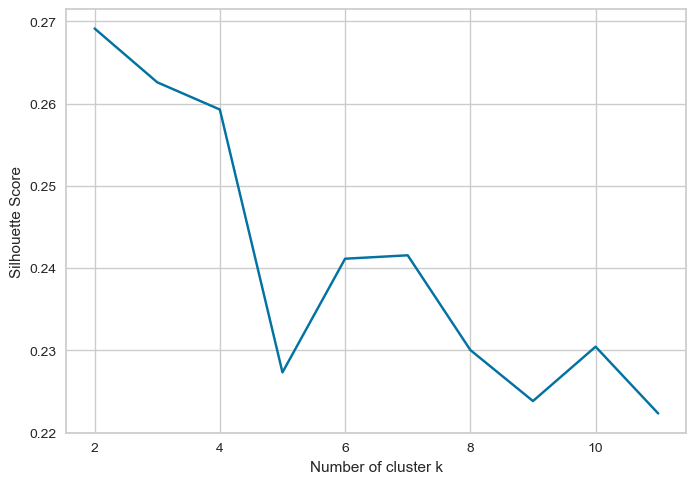

In [31]:
def sil_plot(algo_name):    
    # Initialize dict to store Silhouette score for each k
    sil_score = {} 

    # Iterate for k, fit scaled data to algorithm, store Silhouette score 
    for k in range(2, 12):
        if algo_name == "KMeans":
            algo = KMeans(n_clusters = k, random_state = 1).fit(df_pca7)
            
        if algo_name == "KMedoids":
            algo = KMedoids(n_clusters = k, random_state = 1).fit(df_pca7)
            
        if algo_name == "GMM":
            algo = GaussianMixture(n_components = k, random_state = 1).fit(df_pca7)

        labels = algo.predict(df_pca7)

        sil_score[k] = silhouette_score(df_pca7, labels)

        print(f"For n_clusters: {k}, the Silhouette score is {sil_score[k]}") 

    # Silhouette plot
    plt.figure()

    plt.plot(list(sil_score.keys()), list(sil_score.values()), 'bx-')

    plt.xlabel("Number of cluster k")

    plt.ylabel("Silhouette Score")

    plt.show()

sil_plot("KMeans")

Of all values of K above 5, the best silhouette score is with 7 clusters.


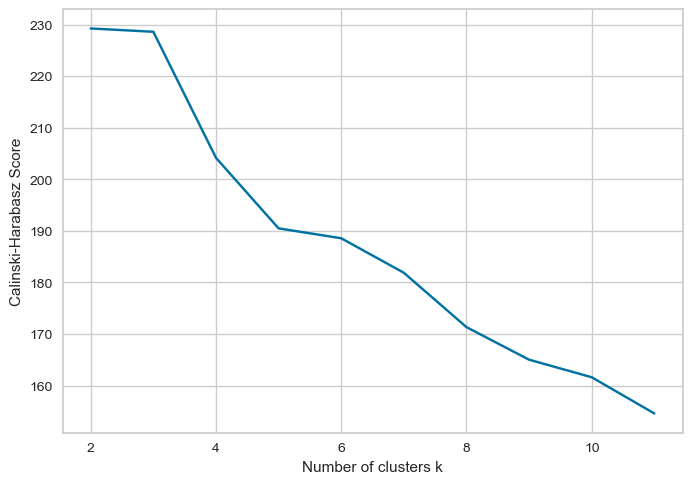

In [32]:
# Initialize dict to store CH score for each K
ch = {}

# Find optimal n_clusters
# Store CH score
for k in range(2, 12):
    kmeans = KMeans(n_clusters = k, random_state = 1).fit(df_pca7)
    
    labels = kmeans.predict(df_pca7)
    
    ch[k] = calinski_harabasz_score(df_pca7, labels)
    
# Plot CH scores
plt.figure()
plt.plot(list(ch.keys()), list(ch.values()), 'bx-')
plt.xlabel("Number of clusters k")
plt.ylabel("Calinski-Harabasz Score")
plt.show()

In [33]:
kmeans = KMeans(n_clusters = 6, random_state = 1) 

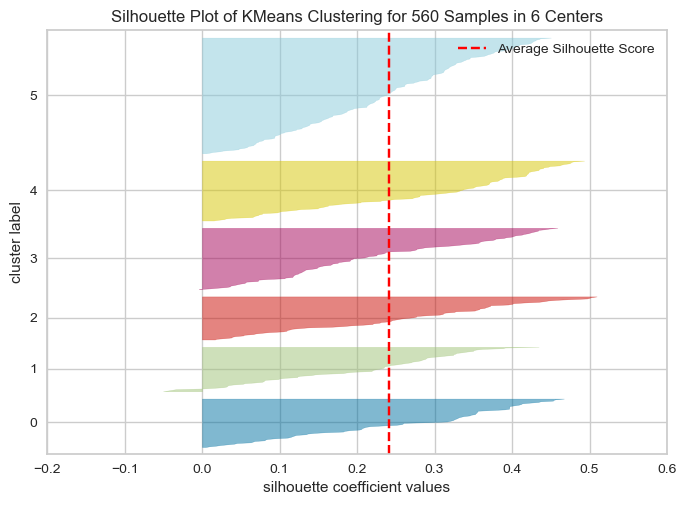

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 560 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [34]:
# Silhouette plot for clusters
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', random_state = 1)
visualizer.fit(df_pca7)        
visualizer.show()

In [35]:
def dfs_labels(labels, algo):
    df_pca[labels] = algo.fit_predict(df_pca7)
    df_pca7[labels] = algo.fit_predict(df_pca7) 
    df_copy[labels] = algo.fit_predict(df_pca7) 
    data_model[labels] = algo.fit_predict(df_pca7) 

dfs_labels('kmeans_labels', kmeans)

In [36]:
data_model['kmeans_labels'].value_counts()

1    173
0     92
3     90
2     73
5     67
4     65
Name: kmeans_labels, dtype: int64

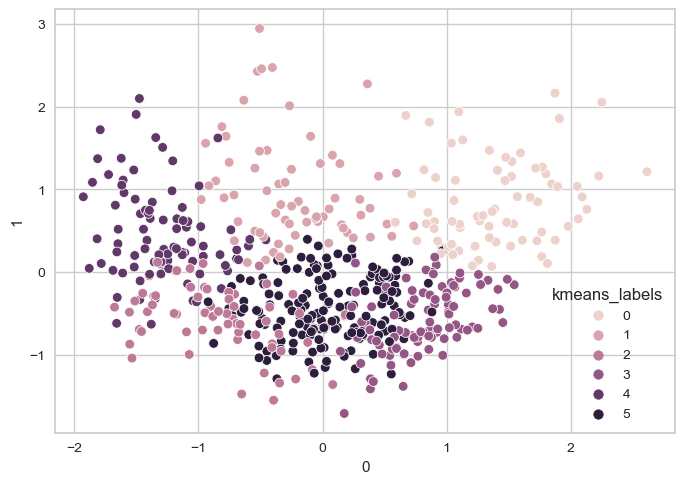

In [37]:
# Function to visualize data with cluster labels
def clusters_plot(PC1, PC2, pca_data, labels):
    sns.scatterplot(x = PC1, y = PC2, data = pca_data, hue = labels)

clusters_plot(0, 1, df_pca7, "kmeans_labels")

In [38]:
def clusters_profiles(labels):

    # Means of features for each cluster
    cluster_profile1 = data_model.groupby(labels).mean()
    cluster_profile2 = df_pca7.groupby(labels).mean()
    cluster_profile2.rename(columns={0: "PC1", 1: "PC2", 2: "PC3", 3: "PC4", 4: "PC5"}, inplace=True)
    

    # Highlight max and min value for each feature
    clusters1=cluster_profile1.style.highlight_max(color="lightgreen", axis=0).highlight_min(color="orange", axis=0)
    clusters2=cluster_profile2.style.highlight_max(color="lightgreen", axis=0).highlight_min(color="orange", axis=0)
    
    #return clusters1
    return clusters2

clusters_profiles('kmeans_labels')

,PC1,PC2,PC3,PC4,PC5
kmeans_labels,,,,,
0,1.396151,0.828383,0.070261,-0.228798,-0.117091
1,-0.227652,0.974653,0.060377,0.476553,0.026786
2,-0.814250,-0.578775,0.743439,0.026385,-0.099941
3,0.805733,-0.589699,0.244608,-0.298219,0.091116
4,-1.295566,0.456698,-0.133671,-0.311712,0.021593
5,0.050482,-0.433548,-0.392898,0.222823,0.016897


Cluster 0) Highest PC1, lowest PC5, potentially a player who drives the net to create passing and shooting opportunities. Shoots from close to mid range. High possession time, long possessions, some defensive value (Point guard)

Cluster 1) Highest PC2 and highest PC4, potentially a decent perimeter player, can score from all distances. (Small Forward and/or Shooting Guard)

Cluster 2) Highest PC3 indicate High post ups, potentially Elite All-stars (Power Forward specialized) 

Cluster 3) Highest PC5 and lowest in PC2, potentially a player who have high possession, high passing, steals, deflection and assists. (Center Position)

Cluster 4) Lowest PC1 and lowest PC4, potentially a player with good defensive value, low possession time, low 3pt shooting, passing with no assists, relatively high PC2, higher rebounds (Regular Forward Positions)

Cluster 5) Lowest PC3 and relatively low PC2, potentially lots of play on perimeter, some perimeter scoring, very high speed and distance. (Transition Player) 

In [39]:
def drop_labels(labels):
    df_pca.drop(columns = labels, inplace=True)
    df_pca7.drop(columns = labels, inplace=True)
    df_copy.drop(columns = labels, inplace=True)

drop_labels("kmeans_labels")

**K-Medoids**

For n_clusters: 2, the Silhouette score is 0.20435297280647405
For n_clusters: 3, the Silhouette score is 0.18493950251514119
For n_clusters: 4, the Silhouette score is 0.18014900491432007
For n_clusters: 5, the Silhouette score is 0.197614870322065
For n_clusters: 6, the Silhouette score is 0.20369889872198332
For n_clusters: 7, the Silhouette score is 0.19381981951587646
For n_clusters: 8, the Silhouette score is 0.20406164007358163
For n_clusters: 9, the Silhouette score is 0.20207589201984813
For n_clusters: 10, the Silhouette score is 0.1919699392142694
For n_clusters: 11, the Silhouette score is 0.17358045281216883


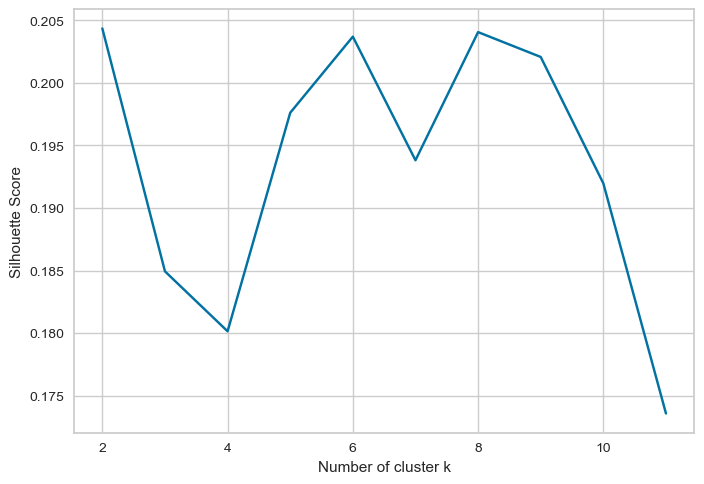

In [40]:
sil_plot("KMedoids")

In [41]:
kmedo = KMedoids(n_clusters = 6, random_state = 1)

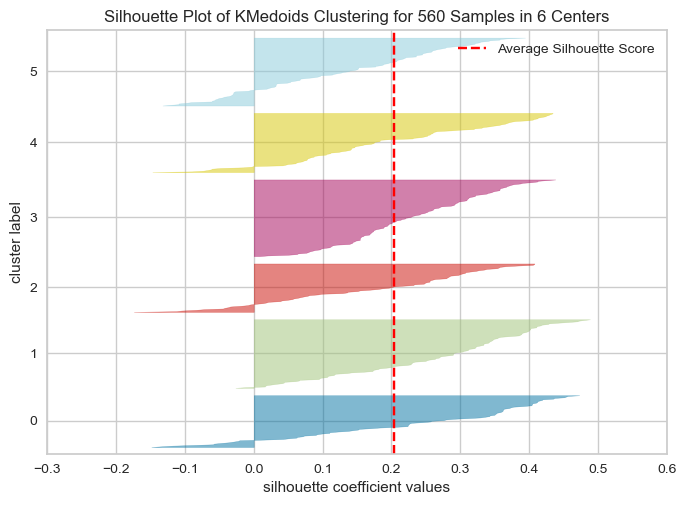

<AxesSubplot:title={'center':'Silhouette Plot of KMedoids Clustering for 560 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [42]:
# Silhouette plot for clusters
visualizer = SilhouetteVisualizer(kmedo, colors='yellowbrick', random_state = 1)
visualizer.fit(df_pca7)        
visualizer.show()

In [43]:
dfs_labels('kmedoid_labels', kmedo)

In [44]:
data_model['kmedoid_labels'].value_counts()

5    153
0    103
3     81
2     78
4     73
1     72
Name: kmedoid_labels, dtype: int64

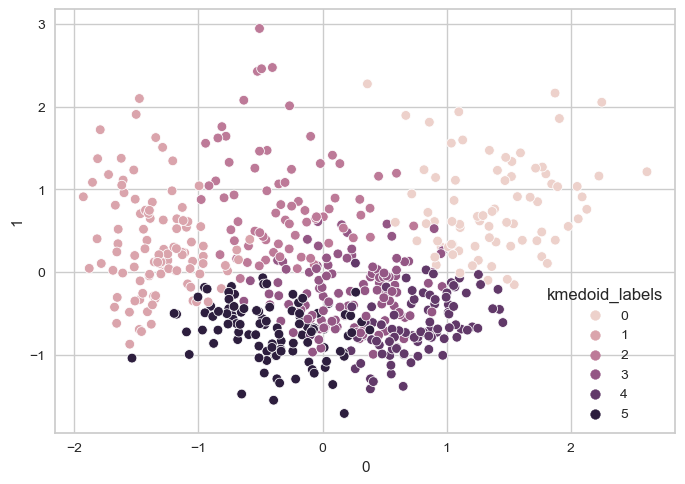

In [45]:
clusters_plot(0, 1, df_pca7, "kmedoid_labels")

In [46]:
drop_labels("kmedoid_labels")

**Gaussian Mixture Model**

For n_clusters: 2, the Silhouette score is 0.2511047233751706
For n_clusters: 3, the Silhouette score is 0.21308334824888855
For n_clusters: 4, the Silhouette score is 0.184781372348969
For n_clusters: 5, the Silhouette score is 0.19808513032509514
For n_clusters: 6, the Silhouette score is 0.16889454756603256
For n_clusters: 7, the Silhouette score is 0.1503838675253731
For n_clusters: 8, the Silhouette score is 0.12228283607737767
For n_clusters: 9, the Silhouette score is 0.13008252248039512
For n_clusters: 10, the Silhouette score is 0.15482427035715698
For n_clusters: 11, the Silhouette score is 0.11562958979181513


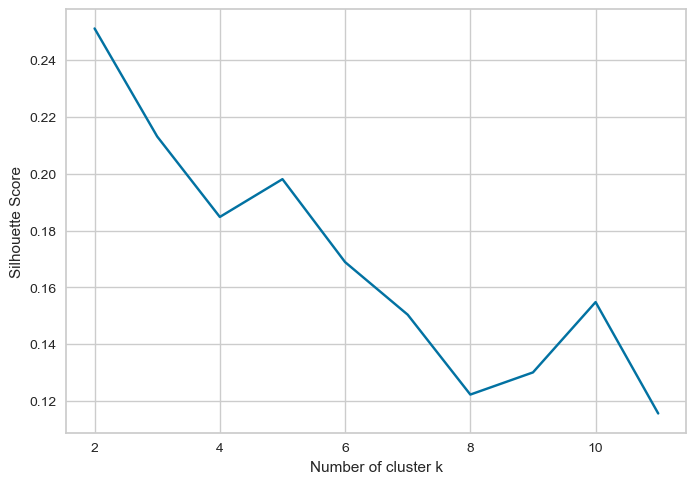

In [47]:
sil_plot("GMM")

In [48]:
gmm = GaussianMixture(n_components = 6, random_state = 1)

In [49]:
dfs_labels('gmm_labels', gmm)

In [50]:
data_model['gmm_labels'].value_counts()

2    126
3    103
1    100
0     90
4     82
5     59
Name: gmm_labels, dtype: int64

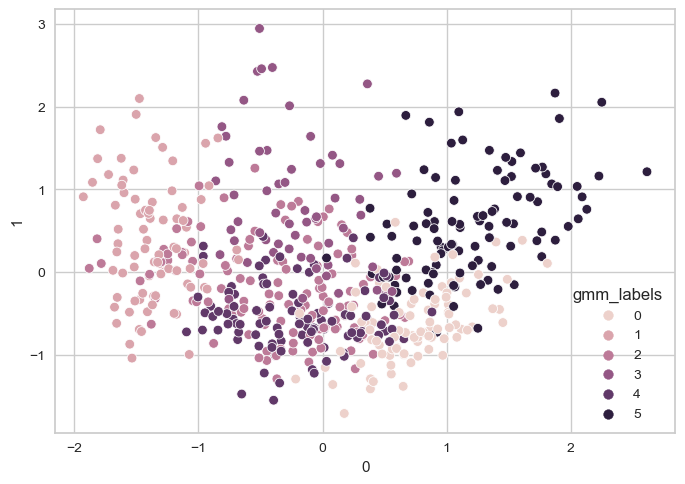

In [51]:
clusters_plot(0, 1, df_pca7, "gmm_labels")

In [52]:
drop_labels("gmm_labels")

**Hierarchical - Agglomerative Clustering**

In [53]:
# List of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# List of linkage methods
linkage_methods = ["single", "average", "complete", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for d in distance_metrics:
    for l in linkage_methods:
        z = linkage(df_pca7, metric = d, method = l)
        c, coph_dist = cophenet(z, pdist(df_pca7))
        print(f"Cophenetic correlation for {d.capitalize()} distance and {l} linkage is {c}")
        
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = d
            high_dm_lm[1] = l
            
# Print combinations of distance metric and linkage method with the highest cophenetic correlation
print('-'*100)
print(
    f"Highest cophenetic correlation: {high_cophenet_corr} with {high_dm_lm[0]} distance and {high_dm_lm[1]} linkage"
)

Cophenetic correlation for Euclidean distance and single linkage is 0.4419745573219506
Cophenetic correlation for Euclidean distance and average linkage is 0.6369676579786598
Cophenetic correlation for Euclidean distance and complete linkage is 0.5821682894527016
Cophenetic correlation for Euclidean distance and weighted linkage is 0.6242493951945739
Cophenetic correlation for Chebyshev distance and single linkage is 0.4343804790328687
Cophenetic correlation for Chebyshev distance and average linkage is 0.6314747890377679
Cophenetic correlation for Chebyshev distance and complete linkage is 0.5347124731286904
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.5800652279369413
Cophenetic correlation for Mahalanobis distance and single linkage is 0.4059289816866442
Cophenetic correlation for Mahalanobis distance and average linkage is 0.5644382782327847
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.4418566072199959
Cophenetic correlation f

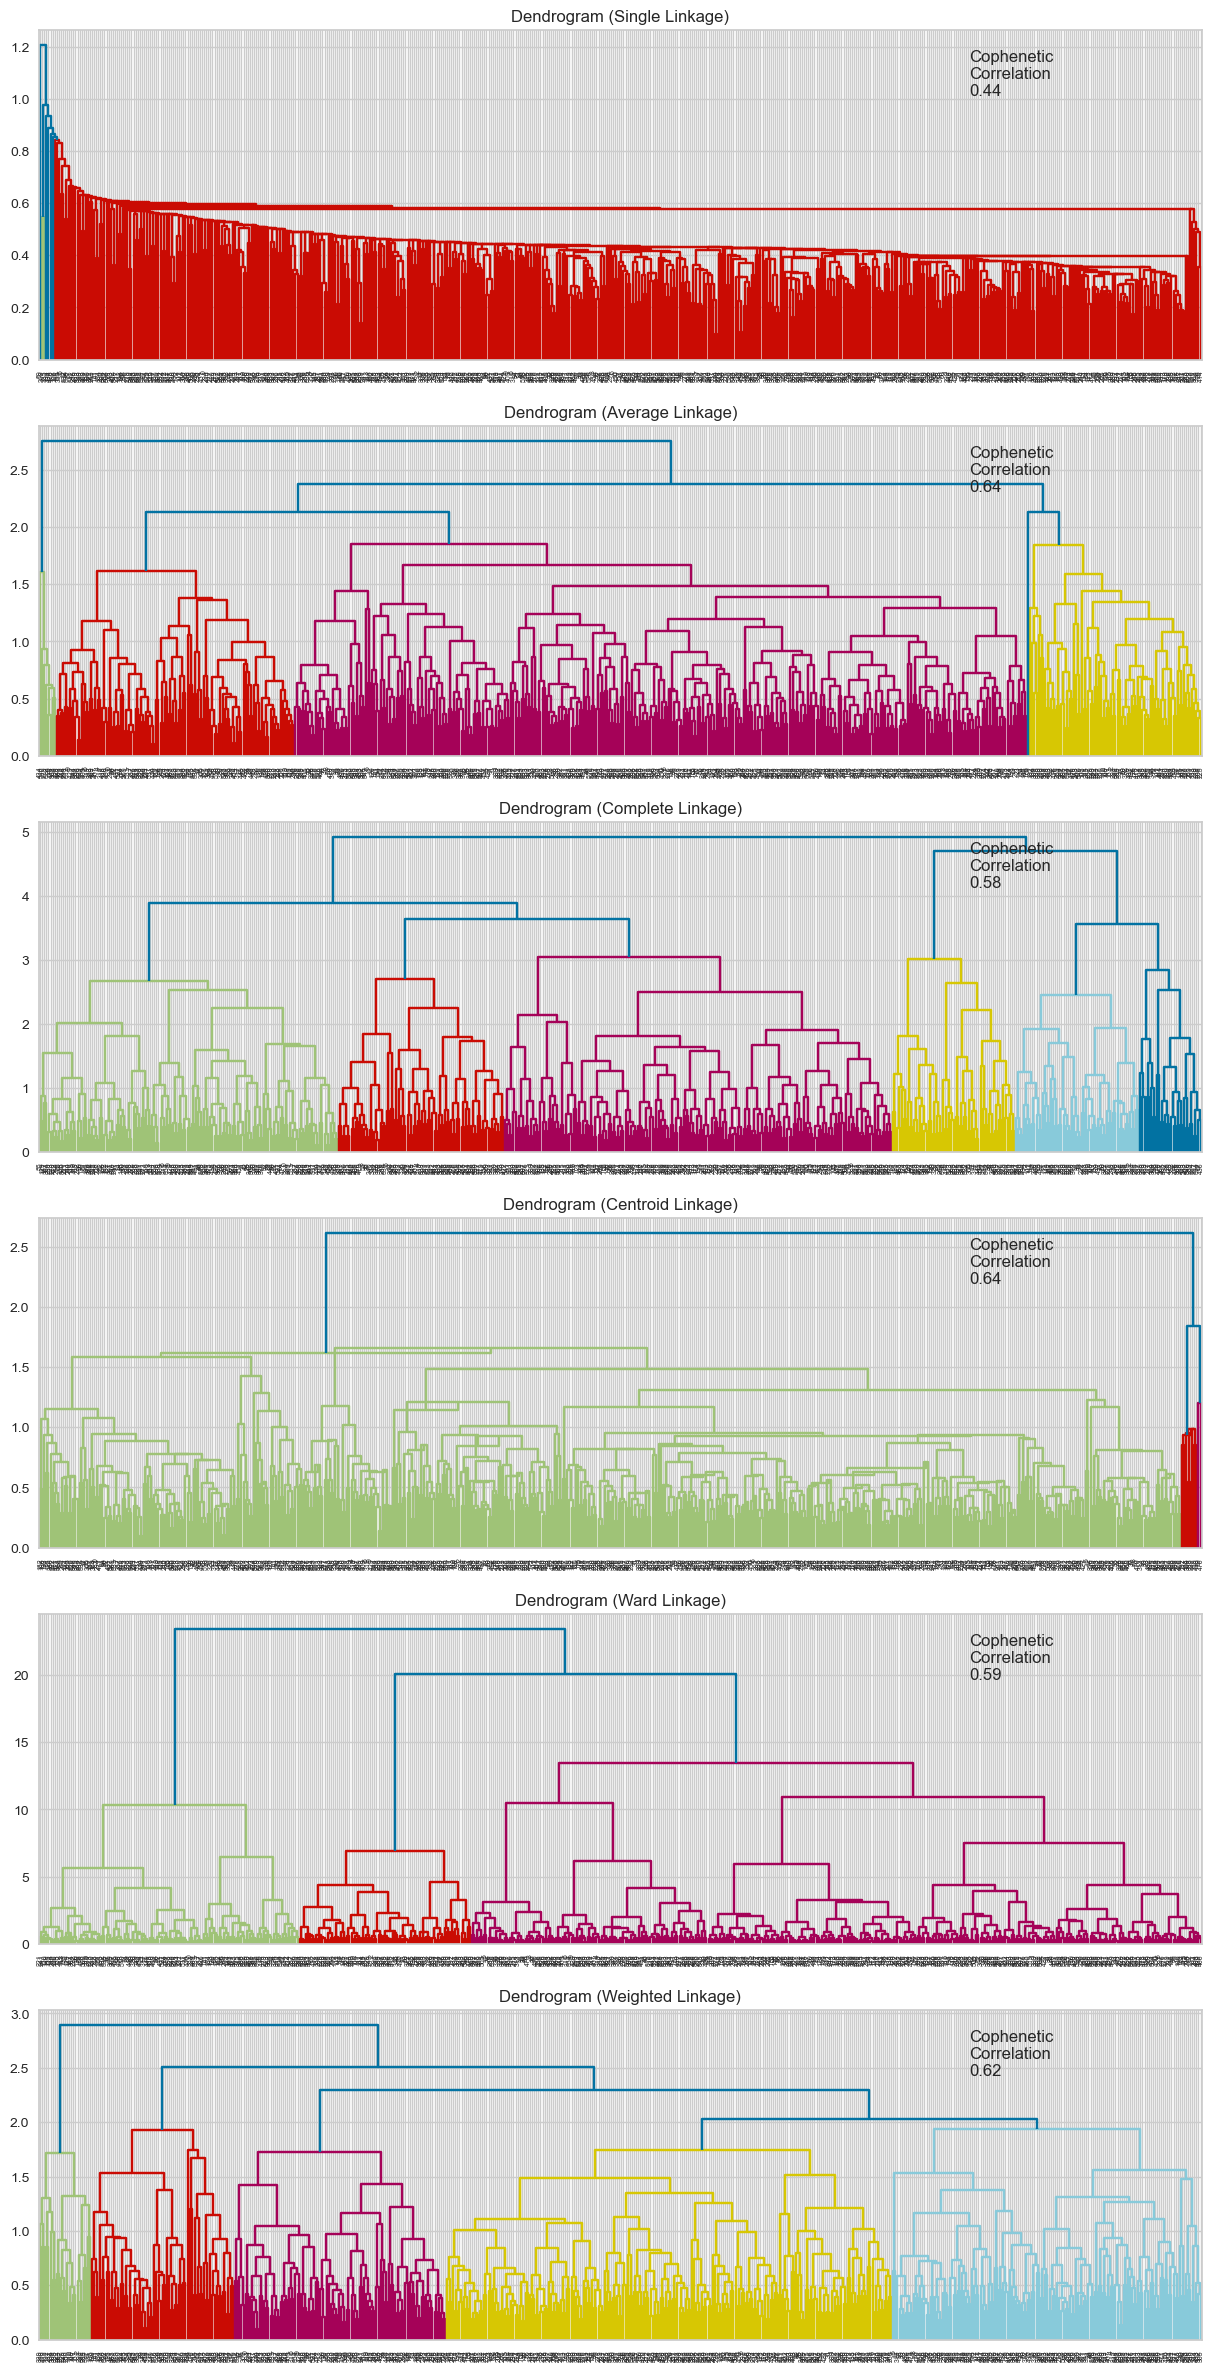

In [54]:
# List of linkage methods
linkage_methods = ["single", "average", "complete", "centroid", "ward", "weighted"]

# Initialize lists to store results of cophenetic coefficient
cols_compare = ["Linkage", "Cophenetic Coefficient"]
values = []

# Create subplot
fig, axes = plt.subplots(len(linkage_methods), 1, figsize = (15, 30))

# Enumerate through linkage methods
# Plot dendrogram and calculate cophenetic correlation
for i, method in enumerate(linkage_methods):
    z = linkage(df_pca7, metric = "euclidean", method = method)

    dendrogram(z, ax = axes[i])
    axes[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(z, pdist(df_pca7))
    axes[i].annotate(f"Cophenetic\nCorrelation\n{coph_corr:0.2f}", (0.80, 0.80), xycoords="axes fraction")

    values.append([method, coph_corr])

In [55]:
# Cophenetic correlation coefficient for each linkage method
df_cophenet = pd.DataFrame(values, columns = cols_compare)
df_cophenet.sort_values(by = "Cophenetic Coefficient", ascending=False)

,Linkage,Cophenetic Coefficient
3,centroid,0.64
1,average,0.64
5,weighted,0.62
4,ward,0.59
2,complete,0.58
0,single,0.44


For n_clusters: 2, the Silhouette score is 0.23559585434708522
For n_clusters: 3, the Silhouette score is 0.21401307318075255
For n_clusters: 4, the Silhouette score is 0.17842832958275945
For n_clusters: 5, the Silhouette score is 0.18401308645844344
For n_clusters: 6, the Silhouette score is 0.16451499719699048
For n_clusters: 7, the Silhouette score is 0.15284410133717005
For n_clusters: 8, the Silhouette score is 0.13787296359074652
For n_clusters: 9, the Silhouette score is 0.1389126418651654
For n_clusters: 10, the Silhouette score is 0.12846507418446096
For n_clusters: 11, the Silhouette score is 0.13292797074758717
For n_clusters: 12, the Silhouette score is 0.13287627114753256


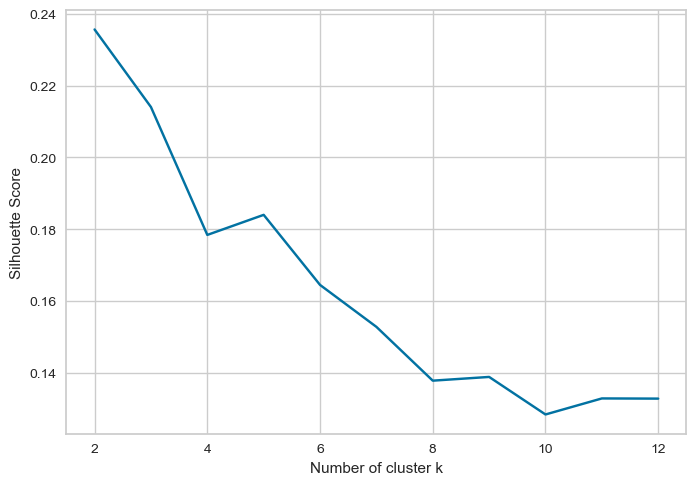

In [56]:
sil_score = {} 

# Iterate for k, fit scaled data to algorithm, store Silhouette score 
for k in range(2, 13):

    algo = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'complete')

    labels = algo.fit_predict(df_pca7)

    sil_score[k] = silhouette_score(df_pca7, labels)

    print(f"For n_clusters: {k}, the Silhouette score is {sil_score[k]}") 

# Silhouette plot
plt.figure()

plt.plot(list(sil_score.keys()), list(sil_score.values()), 'bx-')

plt.xlabel("Number of cluster k")

plt.ylabel("Silhouette Score")

plt.show()

In [57]:
aggc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'complete')

In [58]:
dfs_labels('agg_labels', aggc)

In [59]:
data_model['agg_labels'].value_counts()

0    187
4    144
3     80
5     60
2     59
1     30
Name: agg_labels, dtype: int64

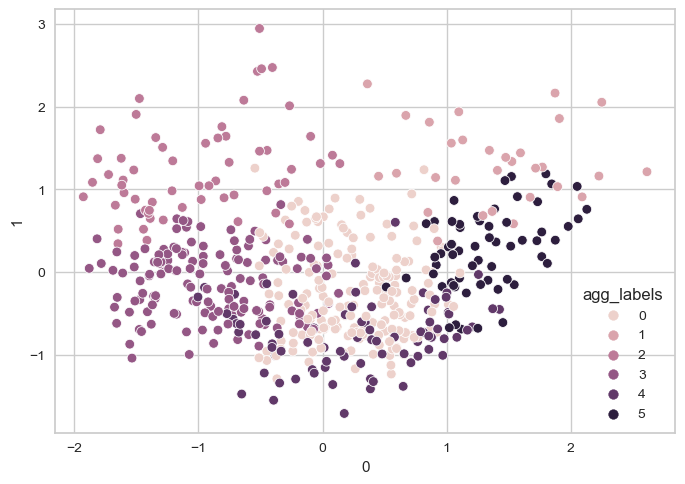

In [60]:
clusters_plot(0, 1, df_pca7, "agg_labels")

In [61]:
drop_labels("agg_labels")

**Comparison of Silhouette scores**

In [62]:
# To store Silhouette scores for different clustering algorithms
silhouette = []
cols = ["Clustering Algorithm", "Avg Silhouette Score"]

def get_sil_scores(algo, algo_name):

    preds = algo.fit_predict(df_pca7)                   

    score = silhouette_score(df_pca7, preds)                

    silhouette.append([algo_name, score])
    
get_sil_scores(kmeans, "K-Means")

get_sil_scores(kmedo, "K-Medoids")

get_sil_scores(gmm, "GMM")

get_sil_scores(aggc, "Hierarchical - Agglomerative")

#get_sil_scores(dbs, "DBSCAN")

In [63]:
df_sil_score = pd.DataFrame(silhouette, columns = cols)
df_sil_score.sort_values(by = "Avg Silhouette Score", ascending=False)

,Clustering Algorithm,Avg Silhouette Score
0,K-Means,0.24
1,K-Medoids,0.20
2,GMM,0.17
3,Hierarchical - Agglomerative,0.16


For n_clusters: 2, the average Silhouette score is 0.26912507137560815
For n_clusters: 3, the average Silhouette score is 0.2625819497871157
For n_clusters: 4, the average Silhouette score is 0.259271400174934
For n_clusters: 5, the average Silhouette score is 0.22730973003260302
For n_clusters: 6, the average Silhouette score is 0.2411299166016775
For n_clusters: 7, the average Silhouette score is 0.2415454524177007
For n_clusters: 8, the average Silhouette score is 0.2300272456287918
For n_clusters: 9, the average Silhouette score is 0.2238259324443394


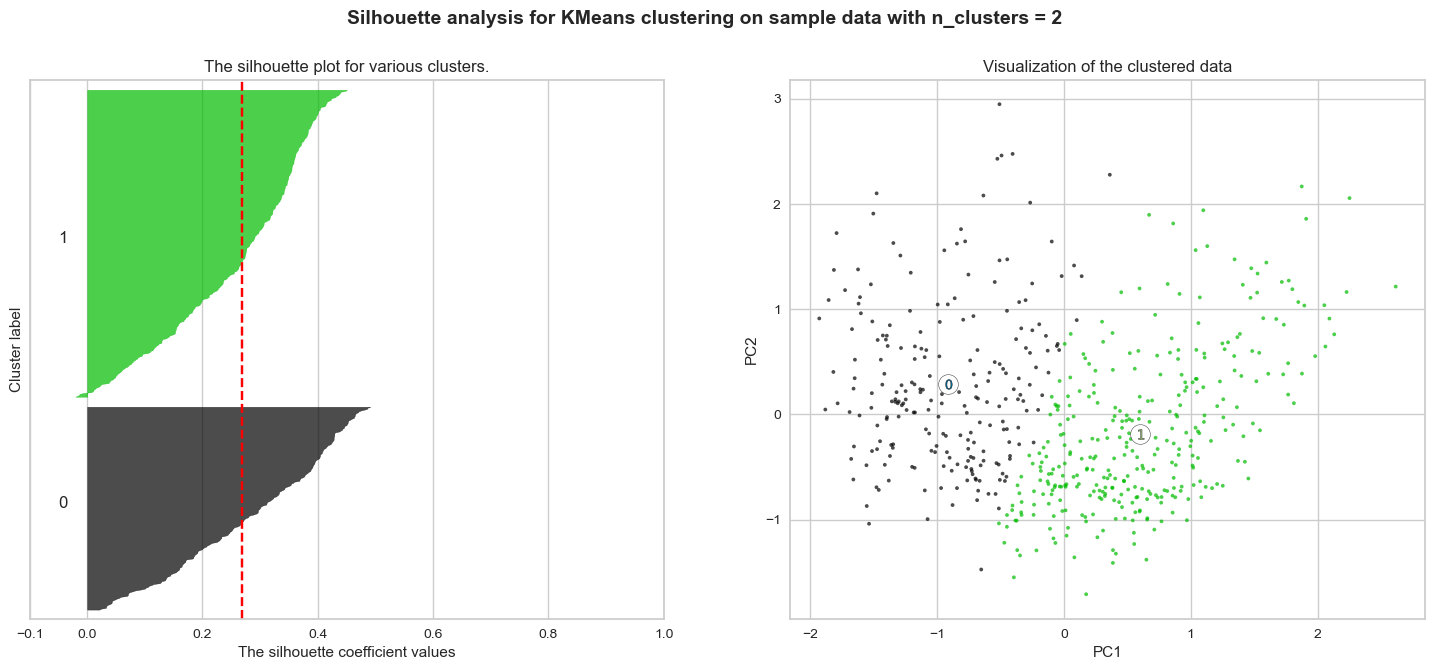

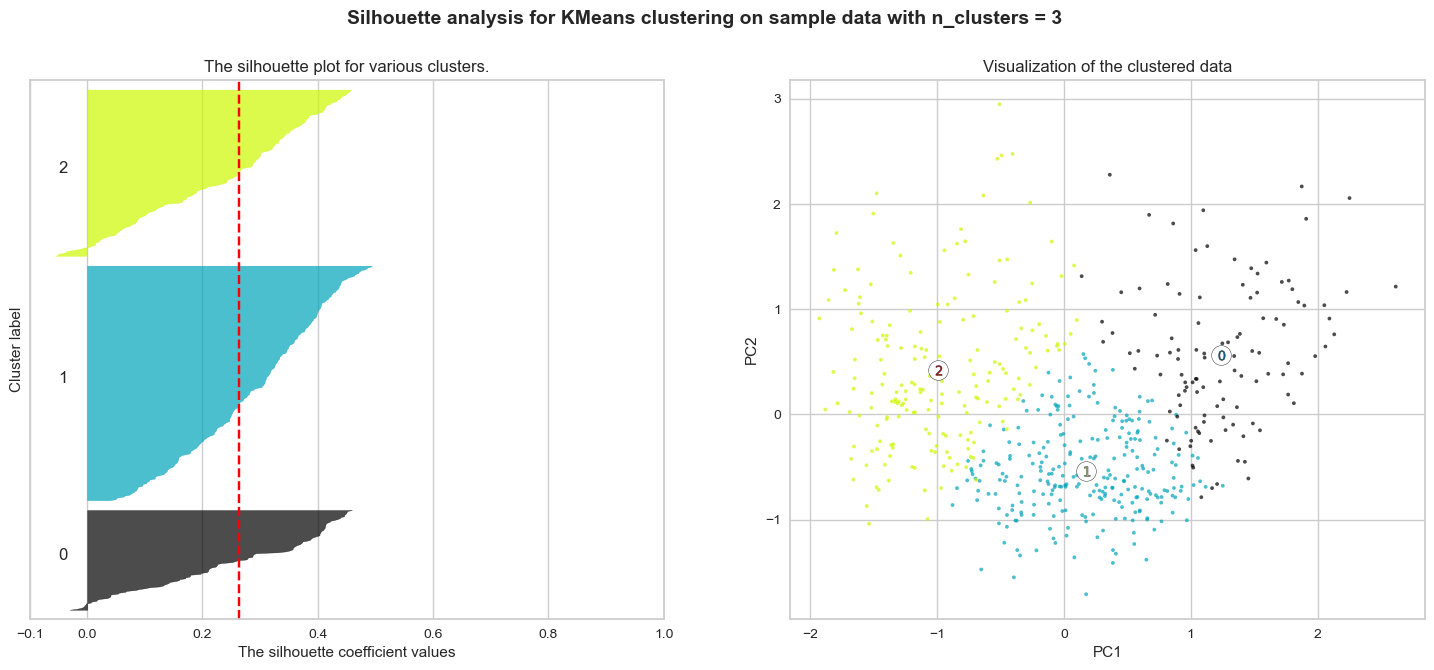

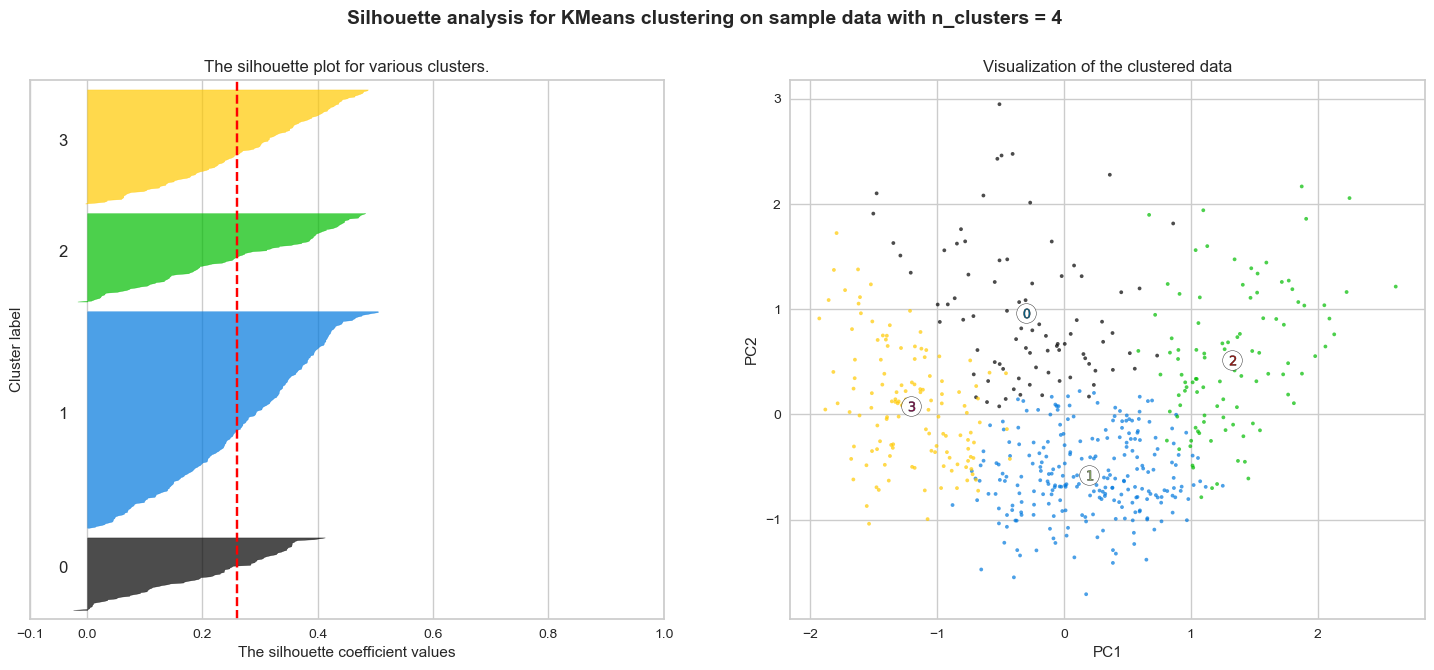

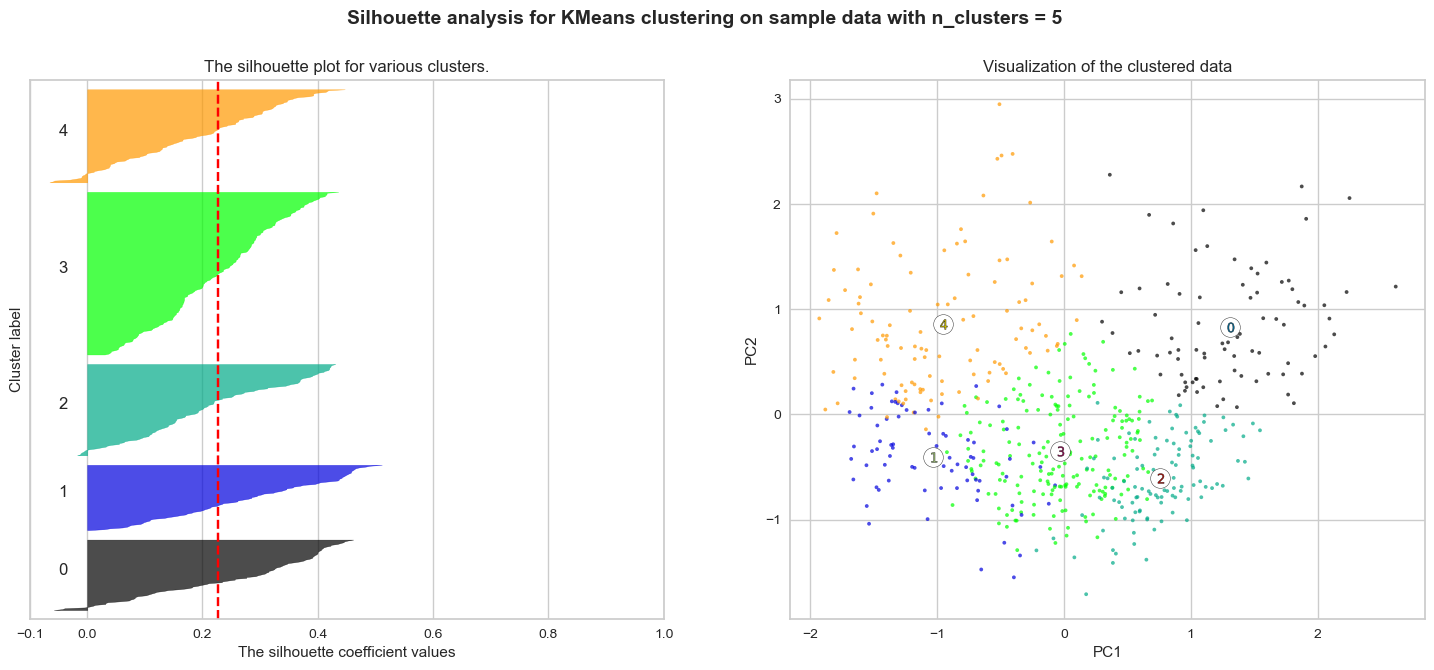

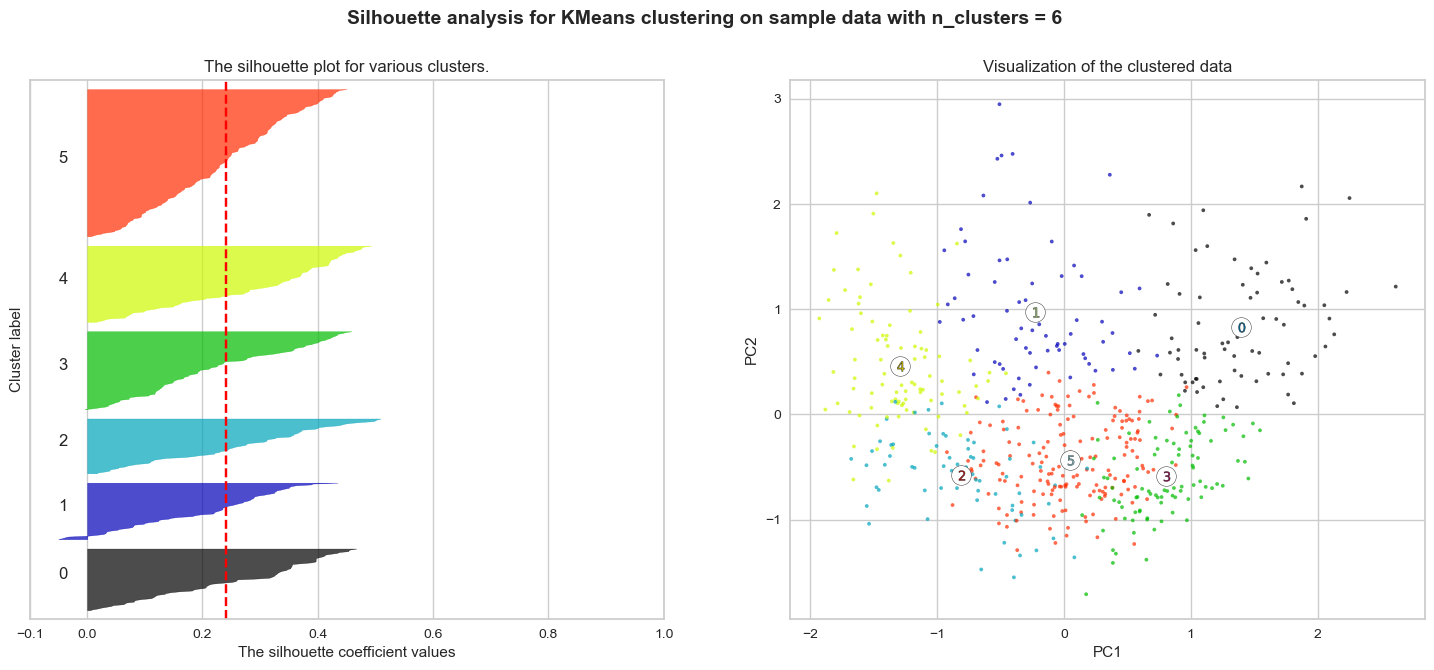

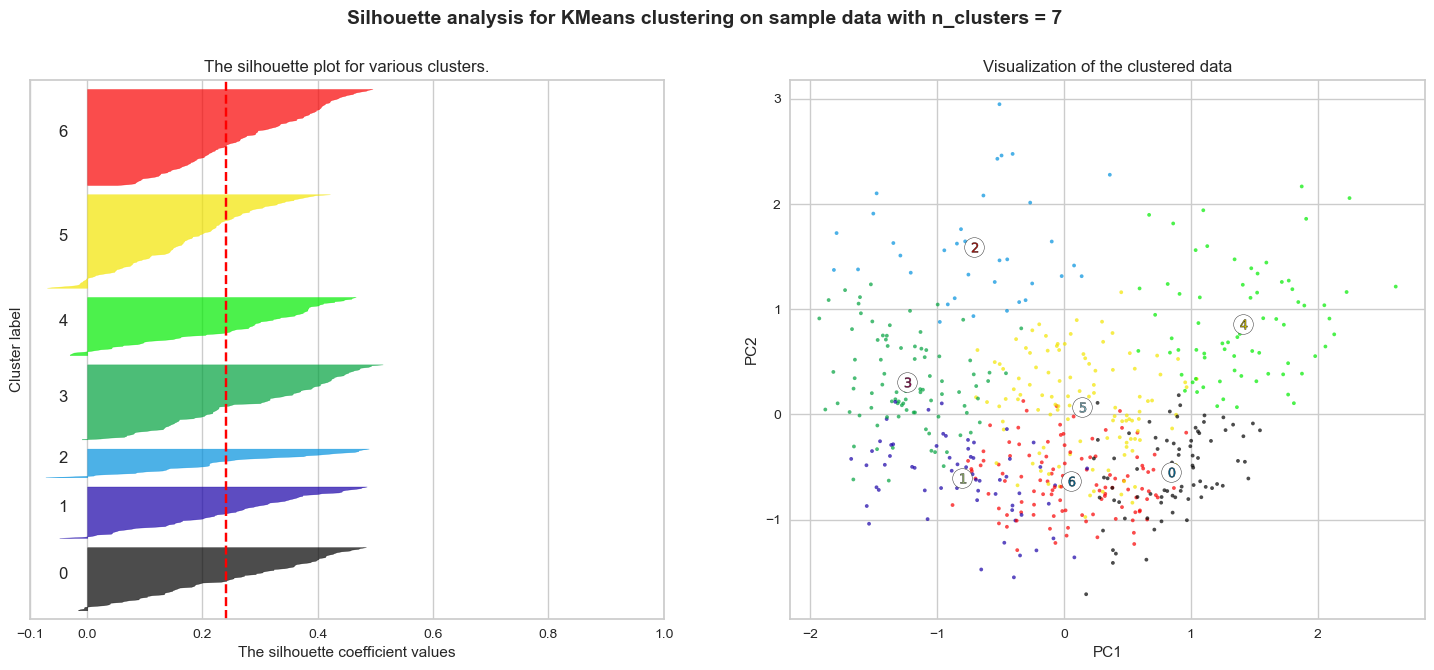

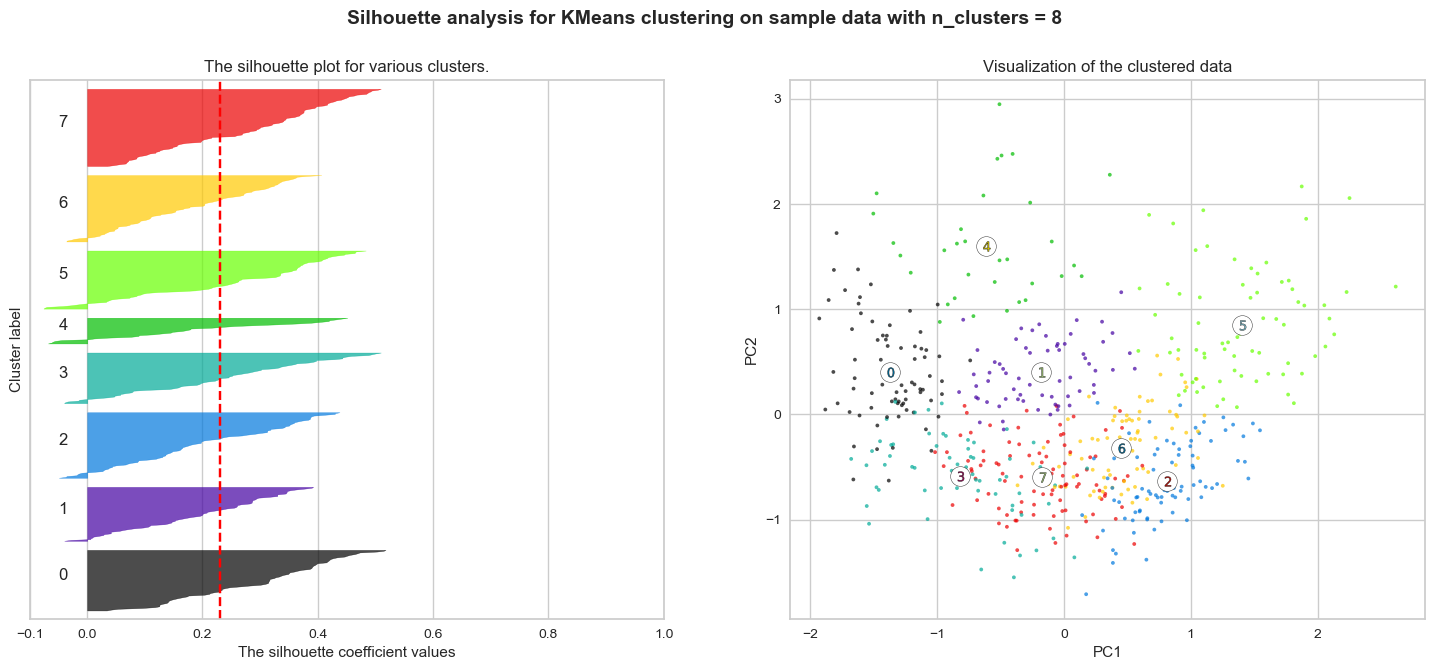

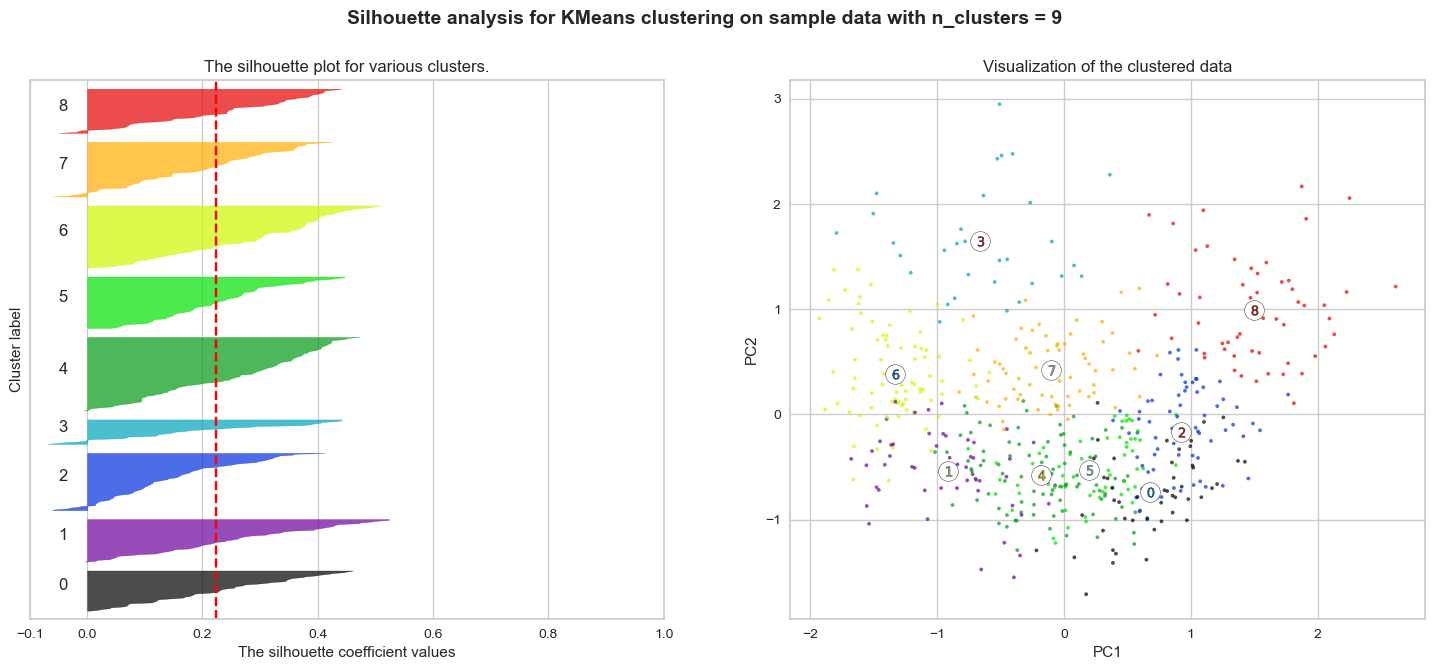

In [64]:
X = df_pca7.to_numpy()

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters = n_clusters, random_state = 1)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters: {n_clusters}, the average Silhouette score is {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("Visualization of the clustered data")
    #ax2.set_xlabel("Feature space for the 1st feature")
    #ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )
    ax2.set_xlabel("PC1")
    ax2.set_ylabel("PC2")
    

plt.show()

In [65]:
df_labels = data_model.filter(["kmeans_labels"])
df_labels.reset_index(inplace=True)

In [66]:
df_labels.rename(columns={"PLAYER_ID_x": "PLAYER_ID"}, inplace=True)

In [67]:
df_profiles = df_profiles.merge(df_labels, how='inner')

In [68]:
def display_profiles(cluster_num):
    return df_profiles[df_profiles.kmeans_labels == cluster_num]

display_profiles(0)

,PLAYER_ID,PLAYER_NAME,All-Stars,PLAYER_HEIGHT_INCHES,PLAYER_WEIGHT,Salary,Adjusted Salary,kmeans_labels
2,1891,Jason Terry,0,74,185,"1,793,166.00","2,195,333.00",0
3,1938,Manu Ginobili,0,78,205,"5,453,500.00","6,667,433.00",0
4,2037,Jamal Crawford,0,77,200,"7,837,338.00","9,534,401.00",0
7,2207,Joe Johnson,1,79,240,"10,929,017.00","13,448,748.00",0
10,2225,Tony Parker,1,74,185,"12,083,984.00","14,754,170.00",0
24,2734,Devin Harris,1,75,185,"3,769,468.00","4,592,882.00",0
30,2749,Jameer Nelson,1,72,190,"5,294,815.00","6,481,180.00",0
32,2756,Sasha Vujacic,0,79,195,"1,383,372.00","1,709,051.00",0
37,101109,Raymond Felton,0,73,205,"2,703,549.00","3,294,161.00",0
39,101114,Deron Williams,1,75,200,"9,172,213.00","11,209,415.00",0


In [69]:
display_profiles(1)

,PLAYER_ID,PLAYER_NAME,All-Stars,PLAYER_HEIGHT_INCHES,PLAYER_WEIGHT,Salary,Adjusted Salary,kmeans_labels
0,1713,Vince Carter,1,78,220,"4,262,143.00","5,155,484.00",1
21,2594,Kyle Korver,1,79,212,"5,622,133.00","6,780,191.00",1
26,2738,Andre Iguodala,1,78,215,"12,247,252.00","14,620,307.00",1
29,2747,JR Smith,0,78,220,"8,247,189.00","9,917,966.00",1
33,2772,Trevor Ariza,0,80,215,"8,873,615.00","10,559,192.00",1
40,101123,Gerald Green,0,79,205,"1,416,874.00","1,719,038.00",1
44,101139,CJ Miles,0,78,220,"5,079,867.00","6,131,248.00",1
54,200755,JJ Redick,0,75,200,"12,639,760.00","15,139,035.00",1
55,200757,Thabo Sefolosha,0,78,215,"4,212,950.00","5,075,083.00",1
58,200782,P.J. Tucker,0,77,245,NaN,NaN,1


In [70]:
display_profiles(2)

,PLAYER_ID,PLAYER_NAME,All-Stars,PLAYER_HEIGHT_INCHES,PLAYER_WEIGHT,Salary,Adjusted Salary,kmeans_labels
14,2544,LeBron James,1,81,250,"33,581,868.00","39,499,567.00",2
16,2548,Dwyane Wade,1,76,220,"15,868,134.00","19,449,467.00",2
36,101108,Chris Paul,1,72,175,"28,927,852.00","34,031,702.00",2
47,101150,Lou Williams,0,74,175,NaN,NaN,2
57,200768,Kyle Lowry,1,72,196,"24,314,021.00","28,502,457.00",2
61,201142,Kevin Durant,1,82,240,"30,454,975.00","35,714,487.00",2
63,201144,Mike Conley,1,73,175,"24,797,241.00","29,260,403.00",2
80,201565,Derrick Rose,1,74,200,"11,148,043.00","13,319,267.00",2
81,201566,Russell Westbrook,1,75,200,"31,661,057.00","37,058,637.00",2
104,201609,Goran Dragic,0,75,190,"17,391,859.00","20,514,291.00",2


In [71]:
display_profiles(3)

,PLAYER_ID,PLAYER_NAME,All-Stars,PLAYER_HEIGHT_INCHES,PLAYER_WEIGHT,Salary,Adjusted Salary,kmeans_labels
5,2199,Tyson Chandler,1,84,235,"10,912,950.00","13,214,374.00",3
20,2585,Zaza Pachulia,0,83,270,"3,492,371.00","4,260,298.00",3
22,2730,Dwight Howard,1,82,265,"16,470,422.00","19,908,730.00",3
41,101133,Ian Mahinmi,0,83,262,"13,490,010.00","16,135,786.00",3
48,101161,Amir Johnson,0,81,240,"9,348,471.00","11,443,556.00",3
49,101162,Marcin Gortat,0,83,240,"12,391,304.00","15,023,765.00",3
66,201149,Joakim Noah,1,83,232,"12,539,866.00","15,051,403.00",3
79,201563,Michael Beasley,0,81,235,"1,831,773.00","2,195,654.00",3
89,201577,Robin Lopez,0,84,281,"10,630,416.00","12,748,185.00",3
92,201580,JaVale McGee,0,84,270,"4,697,569.00","5,609,973.00",3


In [72]:
display_profiles(4)

,PLAYER_ID,PLAYER_NAME,All-Stars,PLAYER_HEIGHT_INCHES,PLAYER_WEIGHT,Salary,Adjusted Salary,kmeans_labels
8,2210,Richard Jefferson,0,79,233,"2,942,613.00","3,592,014.00",4
11,2403,Nene,0,83,250,NaN,NaN,4
12,2440,Matt Barnes,0,79,226,"5,483,825.00","6,714,214.00",4
13,2449,Luis Scola,0,81,241,"3,950,000.00","4,873,965.00",4
17,2561,David West,1,81,250,"1,793,166.00","2,195,333.00",4
18,2564,Boris Diaw,0,80,250,"7,250,000.00","8,959,233.00",4
19,2571,Leandro Barbosa,0,75,194,"2,333,333.00","2,875,557.00",4
23,2733,Shaun Livingston,0,79,192,"5,598,568.00","6,758,711.00",4
25,2736,Luol Deng,1,81,237,"12,014,927.00","14,409,873.00",4
27,2743,Kris Humphries,0,81,235,"6,535,000.00","8,061,442.00",4


In [73]:
display_profiles(5)

,PLAYER_ID,PLAYER_NAME,All-Stars,PLAYER_HEIGHT_INCHES,PLAYER_WEIGHT,Salary,Adjusted Salary,kmeans_labels
1,1717,Dirk Nowitzki,1,84,245,"10,833,333.00","13,252,593.00",5
6,2200,Pau Gasol,1,84,250,"14,020,511.00","16,951,544.00",5
9,2216,Zach Randolph,1,81,250,"11,000,000.00","13,336,952.00",5
15,2546,Carmelo Anthony,1,79,238,"13,478,791.00","16,422,741.00",5
35,101107,Marvin Williams,0,80,237,"9,422,105.00","11,389,213.00",5
45,101141,Ersan Ilyasova,0,81,235,"6,161,018.00","7,418,480.00",5
51,200746,LaMarcus Aldridge,1,83,250,"18,785,620.00","22,489,813.00",5
53,200752,Rudy Gay,0,80,250,"10,769,939.00","12,836,681.00",5
59,200794,Paul Millsap,1,79,257,"21,955,897.00","26,240,622.00",5
62,201143,Al Horford,1,81,240,"25,033,869.00","29,488,657.00",5
